# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9381 Фоминенко Артемий, вариант 63.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

------------------------------------------------------------------------------------------------------------------------

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

------------------------------------------------------------------------------------------------------------------------


## Основные теоритические положения

### Бинарный метод
Бинарное возведение в степень — это приём, позволяющий возводить любое число в $n$-ую степень за $O(\log n)$ умножений (вместо $n$ умножений при обычном подходе).

Представим степень $n$ в двоичном виде. После начнем проходить по двоичной записи (не смотрим на самый первый бит). Если текущий бит равен 0, то мы возводим число в квадрат; иначе (бит равен 1) число возводим в квадрат и умножаем на само себя.

Сложность алгоритма будет $O(\log n)$, так как на каждом шаге мы сдвигаемся на бит вправо.

------------------------------------------------------------------------------------------------------------------------

### Метод множителей
Степень $n$.

Пусть $n=p \cdot q$, где p – наименьший простой делитель числа n, а q > 1.  $\Rightarrow x^{n} = (x^p)^q$.

Когда $n$ простое, тогда $q = 1$, и нам лучше вычислить $x^{n-1}$, а затем умножить на $х$.

------------------------------------------------------------------------------------------------------------------------


### Аддитивная цепочка
Аддитивной цепочкой для числа $n \in \mathbb{N}$ называется последовательность натуральных чисел $a_{0} = 1, a_{1},..., a_{m} = n$, для которой выполняется $a_i = a_j + a_k$, $k \leq j < i$, $i = 1..n$

$l(n) - $ минимальная длина аддитивной цепочки для $n$

------------------------------------------------------------------------------------------------------------------------

### Типы шагов аддитивной цепочки

$$ \forall i \in [1,m], \text{ где m - длина аддитивной цепочки, } a_i = a_j + a_k, 0 \le k \le j < i  $$

* i-ый шаг - удвоение, если $j = k = i - 1$ 
* i-ый шаг - звездный, если $j = i - 1$ 
* i-ый шаг - малый, если $\lambda ( a_i) = \lambda (a_{i-1})$, $ \lambda(n)  = \lfloor \log n \rfloor$ 

------------------------------------------------------------------------------------------------------------------------

### Звездная цепочка

Звездная цепочка - это аддитивная цепочка, в которой текущий элемент получен сложением предыдущего и какого-то $a_j$, где $a_i=a_{i-1}+a_j$ при $0 \leq k \leq i-1$.

------------------------------------------------------------------------------------------------------------------------

### Теорема Брауэра

$$
\exists k < \log \log n : l(n) < (1 + k^{-1}) \cdot {\lceil{\log n} \rceil} + 2^{k-1} - k + 2
$$

При $k = \lambda (\lambda (n)) - 2\lambda (\lambda (\lambda (n)))$

Следствие: $$ \lim_{n\to\infty} \dfrac{l(n)}{\lambda(n)} = 1$$
где $\lambda (n)$ - длина числа в двоичной записи минус 1

------------------------------------------------------------------------------------------------------------------------

###  Алгоритм Брауэра
Вычисляет n степень за  $$\lambda (n) + \dfrac{(1 + o(1))(\lambda (n))}{\lambda ( \lambda (n))} $$

Метод Брауэра позволяет по заданной линейной цепочке $a_{0} = 1, a_{1},..., a_{m} = n$ построить аддитивную цепочку для $2^{n-1}$.

\begin{equation*}
B_{k}(n) = 
 \begin{cases}
       1, 2, 3,... 2^{k}- 1  &\text{если n $< 2^{k}$}\\
   B_{k}(q), 2q, 4q, ..., 2^{k}q, n &\text{если $n \geqslant 2^{k}$ и $q =  \lfloor \frac{n}{2^{k}} \rfloor $}
 \end{cases}
\end{equation*} 


------------------------------------------------------------------------------------------------------------------------

### Гипотеза Шольца-Брауэра

$$ 
l^{\text{*}}(2^n - 1) \le l^{\text{*}}(n) + n - 1
$$
где $l^{\text{*}}(n) - $ длина звездной цепочки

------------------------------------------------------------------------------------------------------------------------

### Алгоритм дробления вектора индексов

Дано $n$, алгоритм ищет минимальную звездную цепочку $a_1, ..., a_m = n$

Пусть $l^{*}(n) = m$ - звёздная цепочка.  $\{ a_i \}_{i=1}^{m}$, $a_1$ = 1, тогда вектор индексов: $\{ r_i \}_{i=1}^{m-1}$, где $r_i = \{x: 1 \leqslant x \leqslant i\}$.

Тогда шаг звездной цепочки: ${a_i}$ = ${a}_{i-1}$ + ${a}_{{r}_{i-1}}$, 2  $\leqslant  i  \leqslant  m$.

Наибольшая звездная цепочка: $S_{max}=\{1, 2, 4, \dots, 2^m\} <=>$ вектор индексов $r_{max} = \{1, 2, 3, \dots, m\}$

Наименьшая звездная цепочка: $S_{min}=\{1,2,3,\dots , m\} <=>$ вектор индексов $r_{min}=\{1, 1, 1, \dots, 1\}$

Пусть $r=\{ r_i \}_{i=1}^{m}$ больше $\tilde{r}=\{ \tilde{r}_i \}_{i=1}^{m}$ если $r_1=\tilde{r}_1; r_2=\tilde{r}_2; \dots; r_{i-1}=\tilde{r}_{i-1};r_i>\tilde{r}_i$

Нахождение минимальной аддитивной цепочки осуществляется с помощью перебора. Каждый вектор индексов разбивать на два: $r=\{ r_i \}_{i=1}^{q}$ - фиксированный вектор, $\rho=\{ \rho_j \}_{j=q+1}^{m}$ - меняющийся вектор. Для фиксированного вектора можно вычислить максимальное и минимальное значение аддитивной цепочки:
$$ a_{max}: \{ r_i \}_{i=1}^{q} \cup \{ q+1, q+2, \dots, m \} => a_{max} = a_{q+1} \cdot 2^{m-q}\\
a_{min}: \{ r_i \}_{i=1}^{q} \cup \{ 1, 1, \dots, 1 \} => a_{min}=a_{q+1}+m-q $$

### Описание алгоритма
Текущий вектор индексов разбивается на два: фиксированный и изменющийся. Для фиксированной части вычисляются $a_{max}$ и $a_{min}$. Если $n \notin [a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору(в сторону уменьшения или увеличения), иначе существляется перебор по меняющемуся вектору. Если для заданной длины не нашлось аддитивной цепочки, то необходимо увеличить длину аддитивной цепочки. 

Длина аддитивной цепочки: $m \in [\underline{l}(n), \overline{l}(n)]$, где $\underline{l}(n)=\lceil log_2 n \rceil,\, \overline{l}(n)=\lambda(n)+\nu(n)-1$

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для $1 < n\leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.

6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.


### Бинарный метод и метод множителей
Реализованы ниже. Вывод под алгоритмами.

In [1]:
#imports
import time
import math
import pylab as plt

In [2]:
def bin_pow(x, k):
    count = 0
    cur = x
    for i in bin(k)[3:]:
        if i == '1':
            cur *= cur * x
            count += 2
        else:
            cur *= cur
            count += 1

    return [cur, count]

In [3]:
def find_first_divider(n):
    if n <= 1:
        return n
    if n % 2 == 0:
        return 2
    for i in range(3, (n+1)//2 ,2):
        if n % i == 0:
            return i
    return n    

def mult_method(x, n):
    if n == 0:
        return [1, 0]
    if n == 1:
        return [x, 0]
    f = find_first_divider(n)
    if f == n:
        res = mult_method(x, n-1)
        res[0] *= x
        res[1] += 1
        return res
    a = bin_pow(x, f)
    b = bin_pow(a[0], n // f)
    return [b[0], a[1] + b[1]]

In [4]:
def print_bin_mul(number, power):
    res_bin = bin_pow(number, power)
    res_mul = mult_method(number, power)
    print("%d^%d" %(number, power) )
    print("Bin method steps:", res_bin[1])
    print("Mul method steps:", res_mul[1])
    print('-------------------------------------------------------')

In [5]:
print_bin_mul(10,5)
print_bin_mul(7,9)
print_bin_mul(3,123123)
print_bin_mul(4,1007)
print_bin_mul(5,1023)
print_bin_mul(321,13372287)
print_bin_mul(321,4097)

10^5
Bin method steps: 3
Mul method steps: 3
-------------------------------------------------------
7^9
Bin method steps: 4
Mul method steps: 4
-------------------------------------------------------
3^123123
Bin method steps: 25
Mul method steps: 21
-------------------------------------------------------
4^1007
Bin method steps: 17
Mul method steps: 14
-------------------------------------------------------
5^1023
Bin method steps: 18
Mul method steps: 14
-------------------------------------------------------
321^13372287
Bin method steps: 36
Mul method steps: 32
-------------------------------------------------------
321^4097
Bin method steps: 13
Mul method steps: 16
-------------------------------------------------------


| x | n | Бинарный метод | Метод множителей | 
| :-: | :-: | :-: | :-: |
| 10 | 5 | 3 | 3 |
|  7 | 9 |  4|4 |
| 3 | 123123 | 25 | 21 |
| 4 | 1007 | 17 | 14 |
| 5 | 1023 | 18 | 14 |
| 321 | 13372287 | 36 | 32 |
| 321 | 4097 | 13 | 16 |

### Вывод:
Из результатов сверху можно сделать вывод, что метод множителей оптимальнее, чем бинарный метод.

Но при $n = 2^i + 1$ бинарный метод оказывется лучше.

Также результаты равны при n < 15.

-------------------------------------------------------


### Алгоритм Брауэра
Реализация алгоритма была немного оптимизирована, чтобы он не добавлял одинаковые числа в цепочку.

In [6]:
def brauer(n, k, Bn):
    power = mult_method(2,k)[0]
    if n < power:
        for i in range(1, power):
            Bn.append(i)
    elif n >= power:
        q = n // power
        brauer(q, k, Bn)
        for i in range(1,k+1):
            q *= 2
            if Bn[-1] != q:
                Bn.append(q)
        if Bn[-1] != n:
            Bn.append(n) 

In [7]:
def print_brauer(n, k):
    Bn = []
    brauer(n,k,Bn)
    print("n = %d, k = %d, Bn =" %(n,k), Bn)
    print("length :", len(Bn))
    

In [8]:
print("Brauer for n = 1234")
print_brauer(1234,2)
print_brauer(1234,3)
print_brauer(1234,4)
print('-----------------------------------------------------------------')
print("Brauer for n = 3456")
print_brauer(3456,2)
print_brauer(3456,3)
print_brauer(3456,4)
print('-----------------------------------------------------------------')
print("Brauer for n = 99999")
print_brauer(99999,2)
print_brauer(99999,3)
print_brauer(99999,4)
print('-----------------------------------------------------------------')
print("Brauer for n = 762")
print_brauer(762,2)
print_brauer(762,3)
print_brauer(762,4)
print('-----------------------------------------------------------------')
print("Brauer for n = 1023")
print_brauer(1023,2)
print_brauer(1023,3)
print_brauer(1023,4)
print('-----------------------------------------------------------------')

Brauer for n = 1234
n = 1234, k = 2, Bn = [1, 2, 3, 2, 4, 8, 16, 19, 38, 76, 77, 154, 308, 616, 1232, 1234]
length : 16
n = 1234, k = 3, Bn = [1, 2, 3, 4, 5, 6, 7, 4, 8, 16, 19, 38, 76, 152, 154, 308, 616, 1232, 1234]
length : 19
n = 1234, k = 4, Bn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 8, 16, 32, 64, 77, 154, 308, 616, 1232, 1234]
length : 25
-----------------------------------------------------------------
Brauer for n = 3456
n = 3456, k = 2, Bn = [1, 2, 3, 6, 12, 13, 26, 52, 54, 108, 216, 432, 864, 1728, 3456]
length : 15
n = 3456, k = 3, Bn = [1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 54, 108, 216, 432, 864, 1728, 3456]
length : 17
n = 3456, k = 4, Bn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 52, 104, 208, 216, 432, 864, 1728, 3456]
length : 24
-----------------------------------------------------------------
Brauer for n = 99999
n = 99999, k = 2, Bn = [1, 2, 3, 2, 4, 6, 12, 24, 48, 96, 97, 194, 388, 390, 780, 1560, 1562, 3124, 6248, 6249, 12498, 24996, 24999

### Вывод: 
Можно заметить, что алгоритм выдаёт минимальную цепочку при $k = \lambda(\lambda(n))$. 

С увеличением k длина цепочки Брауэра растет.

С ростом $n$ разница длины цепочки Брауэра и минимальной аддитивной цепочки будет увеличиваться.

### Алгоритм дробления вектора индексов

In [9]:
def nextVector(n, length):
    add = 0
    if length != len(n):
        add = length - len(n)
    if n == [i + add for i in range(1, len(n) + 1)]:
        return [0 for i in range(len(n))]
    for i in range(len(n) - 1, -1, -1):
        if n[i] < i + 1 + add:
            n[i] += 1
            return n
        n[i] = 1


def getChain(vec1, vec2):
    chain = [1]
    for i in vec1:
        chain.append(chain[-1] + chain[i - 1])
    for j in vec2:
        chain.append(chain[-1] + chain[j - 1])
    return chain


def splitting(n):
    if n == 1:
        return [1]
    from_ = int(log(n, 2))
    end_ = from_ + + bin(n).count('1') + 1
    for m in range(from_, end_):
        q = m // 2
        if q == 0:
            q = 1
        r = [1 for i in range(q)]
        rho = [1 for i in range(q + 1, m)]
        while r != [0 for i in range(q)]:
            chain = getChain(r, rho)
            a_min, a_max = chain[q] + m - q, chain[q] * 2 ** (m - q)
            if chain[-1] == n:
                return chain
            if a_min > n > a_max:
                r = nextVector(r, len(r))
                continue
            while rho != [0 for i in range(q + 1, m)]:
                chain = getChain(r, rho)
                if chain[-1] == n:
                    return chain
                rho = nextVector(rho, len(rho) + len(r))
            r = nextVector(r, len(r))
            rho = [1 for i in range(q + 1, m)]

def print_split(n):
    start = time.time()
    chain = splitting(n)
    sec = time.time() - start
    print("l*(", n, "): ",end=' ')
    for i in chain:
        print(i, end=',')
    print("\nLength:", len(chain))
    print("Time: ", sec, "sec")
    print("---------------------")


In [10]:
print_split(513)
#print_split(600)
print_split(704)

l*( 513 ):  1,2,4,8,16,32,64,128,256,257,513,
Length: 11
Time:  41.19803214073181 sec
---------------------
l*( 704 ):  1,2,3,4,7,11,22,44,88,176,352,704,
Length: 12
Time:  92.78072428703308 sec
---------------------


| Значение n | Значение k | Длина цепочки алгоритма Брауэра | Время работы а. Брауэра   |Длина цепочки а. дробления  | Время работы а. дробления | Время работы бинарного метода | Время работы метода множителей |
| :-: | :-: | :-: | :-: | :-: |  :-: | :-: | :-: |
| 513 | 3 | 11 | 2.0976409912109375 | 11| 41.12959098815918 | 9.60826873779e-05 | 0.000133037567139 |
| 600 | 2 | 13 |  2.388014078140259| 12 | 60.928571939468384| 0.000108957290649 | 9.70363616943e-05 |
| 704 | 3 | 11 | 4.85647177696228 | 12 | 91.53808236122131 | 6.91413879395e-05 | 0.000144004821777 |
| 801 | 3 | 13 | 2.774775981903076 | 13 | 1083.378122806549 | 8.48770141602e-05 | 0.000138998031616 |


#### Вывод: 
Алгоритм дробления вектора индексов оказался самым неэффективным по времени, и время поиска растет с увеличением параметра $n$.

Можно заметить:
* Метод дробления вектора индексов эффективен по результату, но не по времени
* Метод Бауэра и метод множителей эффективны по времени, но не всегда по результату



### Проверка следствия теоремы Брауэра

In [11]:
max_n = 100
arrLen = [len(splitting(i)) for i in range(1, max_n+1)]

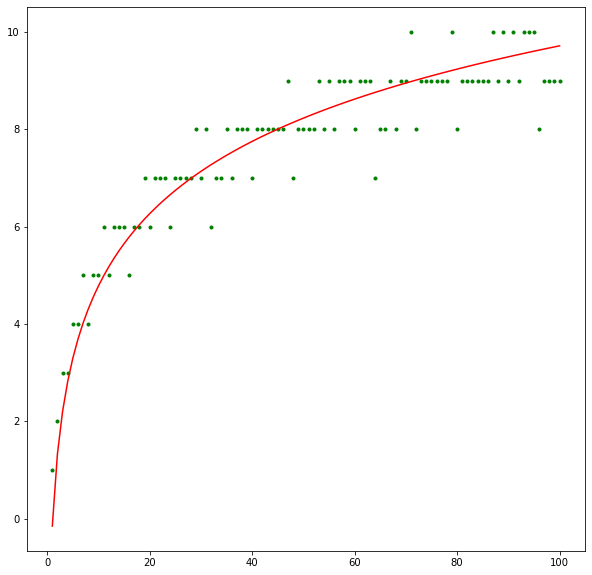

In [12]:
N = len(arrLen)
sumYi = sum(arrLen)
sumLnXi = sum([log(i) for i in range(1, max_n + 1)])
sumLnXi2 = sum([log(i) ** 2 for i in range(1, max_n + 1)])
sumYiLnxi = sum(arrLen[i] * log(i + 2) for i in range(N))
A = (sumYi * sumLnXi2 - sumYiLnxi * sumLnXi) / (N * sumLnXi2 - sumLnXi ** 2)
B = (N * sumYiLnxi - sumYi * sumLnXi) / (N * sumLnXi2 - sumLnXi ** 2)

plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(1, max_n + 1)], arrLen, color='g', marker='.')
plt.plot([i for i in range(1, max_n + 1)], [A + B * log(i) for i in range(1, max_n + 1)], color='red')
plt.show()

#### Вывод: 

Как видно, аппроксимирующая прямая $l(n)$ схожа с графиком логарифма. Это подтвержает следствие теоремы Брауэра, поскольку в этом случае на бесконечности $\lambda(n)$ и $l(n)$ будут эквивалентны.

### Проверка гипотезы Шольца-Брауэра  от 2 до 10
$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

In [ ]:
arr1 = [i + len(splitting(i)) - 1 for i in range(2,11)]
arr2 = [len(splitting(2**i-1)) for i in range(2,11)]

In [ ]:
for i in range(len(arr1)):
    print("l*(n)+n-1 = ",arr1[i], end = " :: ")
    print("l*(2^n-1) = ",arr2[i])
    print()

| Значение n |$l ^ * (2 ^  n- 1)$ | $l ^ * (n) + n - 1$ |
| :-: | :-: | :-: |
|2 | 3 |  3| 
|3 | 5 | 5 | 
|4 | 6 | 6 | 
|5 | 8 | 8 |
|6 | 9 | 9 | 
|7 | 11 | 11 | 
|8 | 11 | 11 | 
|9 | 13 | 13 |
|10 | 14 | 14|

##### Вывод:
Гипотеза Шольца-Брауэра верна для $n \leq 10$. 

###  Выводы по работе

В ходе выполнения практической работы были сформированы представления об аддитивных цепочках, получен навык использования систем компьютерной алгебры для реализации алгоритмов. Были реализованы и проанализированы следующие методы: 
* бинарный метод 
* метод множителей
* метод Брауэра 
* метод дробления вектора индексов.   

Эксперименты показали, что для точных, не требующих высокой скорости, вычислений необходимо использовать алгоритм дробления вектора индексов, а для вычислений с допустимой погрешностью лучше использовать метод множителей или алгоритм Брауэра.

Так же было проверено следствие 1 теоремы Брауэра $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
Из этого следует, что чем больше число n , тем, при его увеличении, будет меньше расти длина минимальной аддитивной цепочки.

Проеверена гипотеза Шольца-Брауэра $l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$ для $n$ от 1 до 10 на алгоритме дробления вектора индексов. 

Исходя из этого можно быстрее строить минимальные аддитивные цепочки для чисел $n = 2^i - 1$